# Steps-:
1. We will load the libraries.
2. Read the dataset.
3. Split the data into train and test.
4. Train the Model over our dataset.
5. Save the Model.
6. Test the model for test datset.

## Using cnn for handwritten character recognition, knn and svm for handwritten digit recognition, we can recognise any word and then, we can find the similar word from a website using NLTK Library.

In [1]:
import struct
import numpy as np
from sklearn import svm,metrics
import matplotlib.pyplot as plt
import gzip
%matplotlib inline

In [2]:
def read_idx(filename) :
  with gzip.open(filename) as f:
      zero,data_type,dims=struct.unpack('>HBB',f.read(4))
      shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
      return np.fromstring(f.read(),dtype=np.uint8).reshape(shape)
 

In [4]:
raw_train = read_idx("train-images-idx3-ubyte.gz")
train_data =np.reshape(raw_train,(60000,28*28))  
train_label =read_idx("train-labels-idx1-ubyte.gz")  
raw_test = read_idx("t10k-images-idx3-ubyte.gz")
test_data =np.reshape(raw_test,(10000,28*28))  
test_label =read_idx("t10k-labels-idx1-ubyte.gz")

C:\Users\HP\AppData\Local\Temp\ipykernel_15332\2472932204.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(),dtype=np.uint8).reshape(shape)


In [5]:
train_label.shape

(60000,)

In [6]:
idx = (train_label==2) | (train_label==3) | (train_label == 8) 

In [7]:
print(train_label[0:20])
print(idx[0:20])


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[False False False False False  True False  True False False  True False
  True False False False  True  True False False]


In [8]:
x=train_data[idx]/255.0
y=train_label[idx]
svc = svm.SVC(C=3, gamma=0.05).fit(x,y)

In [9]:
idx = (test_label==2) | (test_label==3) | (test_label == 8)  
x_test=test_data[idx]/255.0 
y_true=test_label[idx] 
y_pred = svc.predict(x_test)

In [10]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')




Confusion matrix, without normalization
[[1024    1    7]
 [   3 1001    6]
 [   1    3  970]]


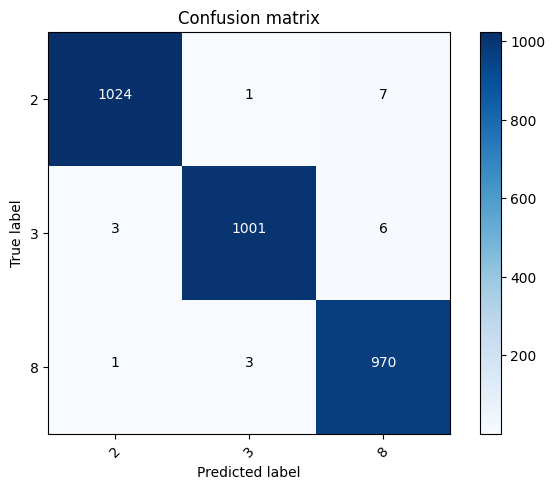

In [11]:
cm=metrics.confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm,["2","3","8"], normalize=False)

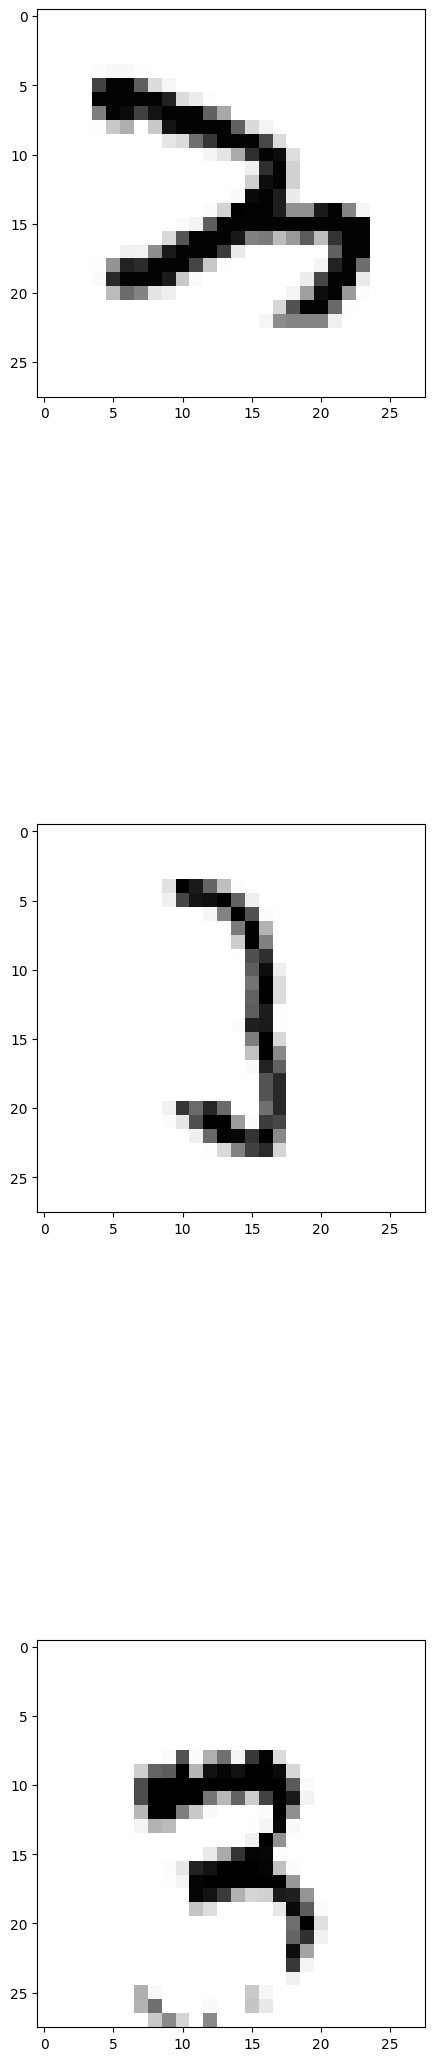

In [12]:
idx = np.where((y_pred == 2 ) & (y_true == 3))[0]
fig = plt.figure(figsize=(5,30))
for i in range(len(idx)):
    ax=fig.add_subplot(len(idx), 1 ,i+1)
    imgplot=ax.imshow(np.reshape(x_test[idx[i],:],(28,28)) , cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()